# Tempel 

In [1]:
df = read.table("../../tempel_limpio_full.dat")
colnames(df) <- c('galID', 'ra_rad', 'dec_rad', 'zCMB', 'rextAB', 'gextAB', 'uextAB',
                  'rabs','gabs','uabs','r50','r90')

In [2]:
head(df,3)

galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
1.237649e+18,4.302659,0.006149179,0.05236439,17.36489,17.82147,18.90977,-18.73781,-18.27942,-17.27946,4.452624,8.327925
1.237649e+18,4.309919,0.005996814,0.07266134,16.85341,17.24536,18.35984,-19.98522,-19.58093,-18.55669,2.092882,5.799765
1.237649e+18,4.313667,0.007160015,0.16412390,16.27763,17.52155,19.80539,-22.61547,-21.72257,-19.55359,3.012558,9.305360


In [3]:
length(df$galID)

[1] 557559

In [4]:
r5 = df$r50
r9 = df$r90
range(r5)

[1] -99.9000 125.0923

## [ dfbueno ] Seleccion de glx con r50 bien calculado

In [5]:
dfbueno = subset(df, df$r50 >= 1.6)

length(dfbueno$r50)
range(dfbueno$r50)

[1] 469842

[1]   1.600007 125.092300

## [ df1 ] Seleccion de glx con r50 bien calculado + mr<16  

In [6]:
df1 = subset(df, df$r50 > 1.6 & df$rextAB < 16)
range(df1$r50)
length(df1$r50)

[1]   1.600076 103.487100

[1] 71294

In [7]:
head(df1,3)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
4,1.237649e+18,3.520162,-0.01895346,0.06827128,15.67758,16.55221,18.41877,-21.05556,-20.27490,-18.48057,3.728195,11.653700
11,1.237649e+18,3.547027,-0.02023635,0.01367959,13.99719,14.56983,15.76445,-19.11036,-18.53349,-17.38972,8.449419,17.503450
17,1.237649e+18,3.635346,-0.02130850,0.07400486,15.56765,16.32024,17.84108,-21.33739,-20.67443,-19.19117,3.521352,8.158723


### Bines en Magnitud absoluta  
##### (Tiene que cubir todo el rango de rabs del tempel)

In [8]:
range(df1$rabs)

[1] -24.757484  -8.035603

In [9]:
bin = c(-23.0, -22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19.0, -17.8)
length(bin)

[1] 9

In [10]:
dfm1 = subset(df1, df1$rabs > bin[1] & df1$rabs <= bin[2])
dfm2 = subset(df1, df1$rabs > bin[2] & df1$rabs <= bin[3])
dfm3 = subset(df1, df1$rabs > bin[3] & df1$rabs <= bin[4])
dfm4 = subset(df1, df1$rabs > bin[4] & df1$rabs <= bin[5])
dfm5 = subset(df1, df1$rabs > bin[5] & df1$rabs <= bin[6])
dfm6 = subset(df1, df1$rabs > bin[6] & df1$rabs <= bin[7])
dfm7 = subset(df1, df1$rabs > bin[7] & df1$rabs <= bin[8])
dfm8 = subset(df1, df1$rabs > bin[8] & df1$rabs <= bin[9])

[1] 71294

[1] 5597

[1] 10110

[1] 14372

[1] 13047

[1] 10237

[1] 7244

[1] 4688

[1] 3912

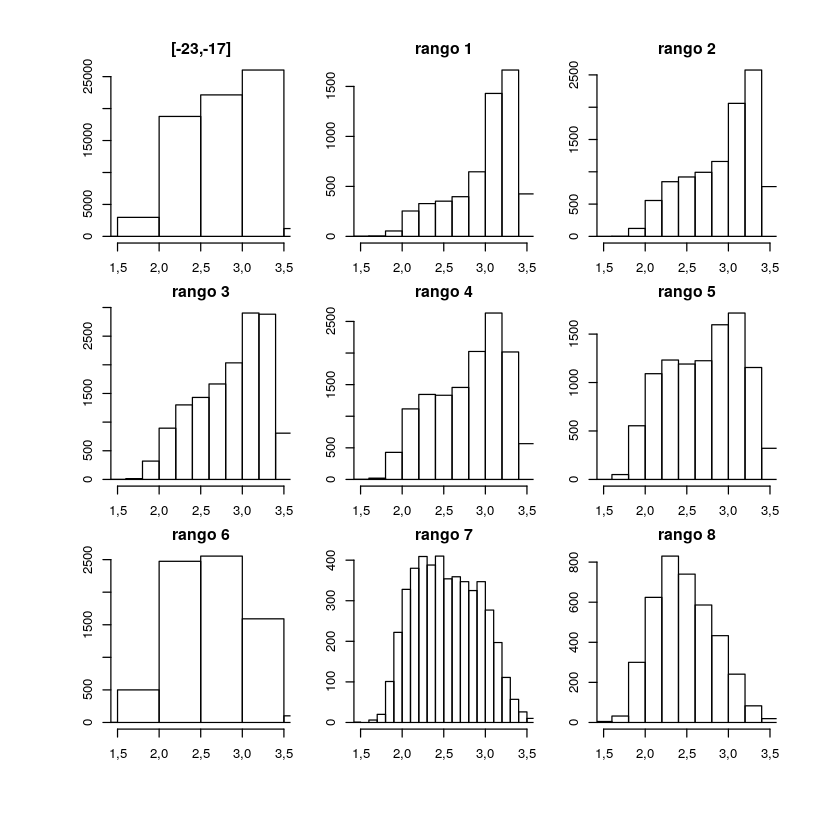

In [11]:
#cairo_ps("xx.eps")
par(mfrow=c(3,3))
par(mar = c(2, 2, 2, 2))
par(oma = c(5, 5, 2, 2))
#par(mar = c(0, 0, 0, 0))
#par(oma = c(5, 6, 2, 2))

limx=c(1.5,3.5)
hist(df1$r90/df1$r50, xlim=limx, breaks=30, main='[-23,-17]')

hist(dfm1$r90/dfm1$r50, xlim=limx, breaks=30, main='rango 1')
hist(dfm2$r90/dfm2$r50, xlim=limx, breaks=30, main='rango 2')
hist(dfm3$r90/dfm3$r50, xlim=limx, breaks=30, main='rango 3')
hist(dfm4$r90/dfm4$r50, xlim=limx, breaks=30, main='rango 4')
hist(dfm5$r90/dfm5$r50, xlim=limx, breaks=30, main='rango 5')
hist(dfm6$r90/dfm6$r50, xlim=limx, breaks=30, main='rango 6')
hist(dfm7$r90/dfm7$r50, xlim=limx, breaks=30, main='rango 7')
hist(dfm8$r90/dfm8$r50, xlim=limx, breaks=30, main='rango 8')

length(df1$r90/df1$r50)
length(dfm1$r90/dfm1$r50)
length(dfm2$r90/dfm2$r50)
length(dfm3$r90/dfm3$r50)
length(dfm4$r90/dfm4$r50)
length(dfm5$r90/dfm5$r50)
length(dfm6$r90/dfm6$r50)
length(dfm7$r90/dfm7$r50)
length(dfm8$r90/dfm8$r50)

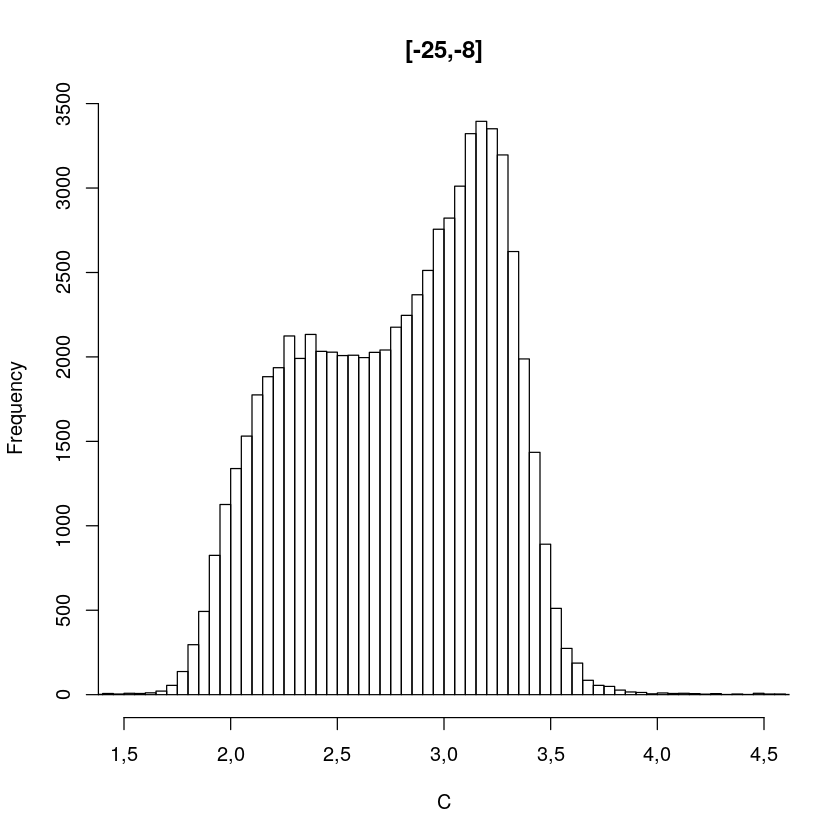

[1] 71294

[1]  1,06311 10,57661

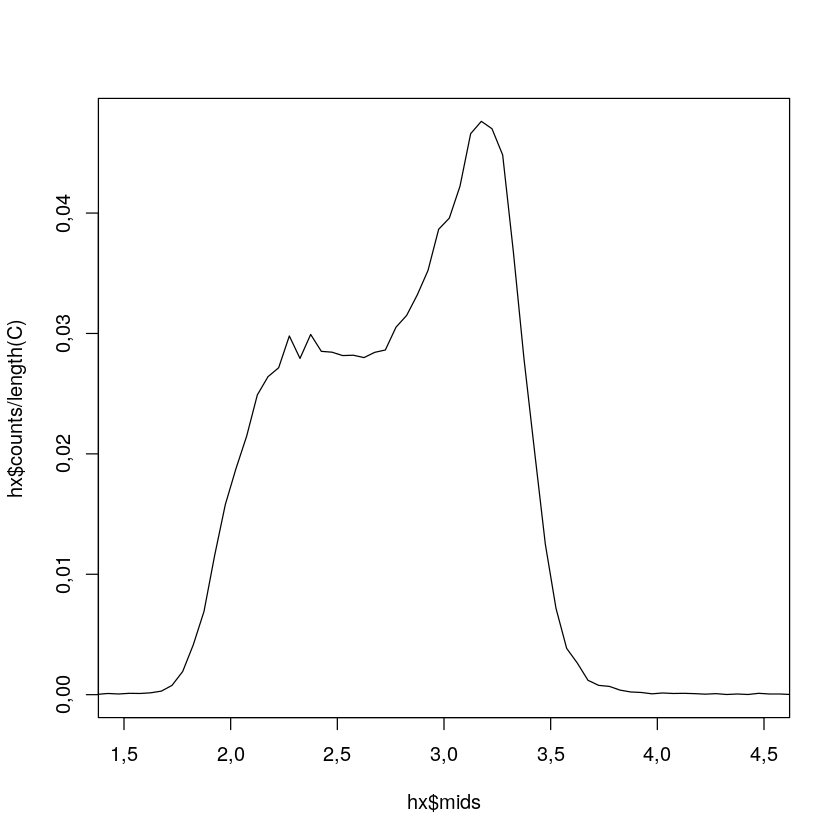

In [12]:
limx=c(1.5,4.5)
C = df1$r90/df1$r50
hist(C, xlim=limx, breaks=300, main='[-25,-8]')

hx = hist(C,plot=F,breaks=300)
plot(hx$mids,hx$counts/length(C),type='l',xlim=limx)
length(C)
range(C)

Empirical CDF:	  71294 unique values with summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1,063   2,403   2,837   2,780   3,156  10,577 

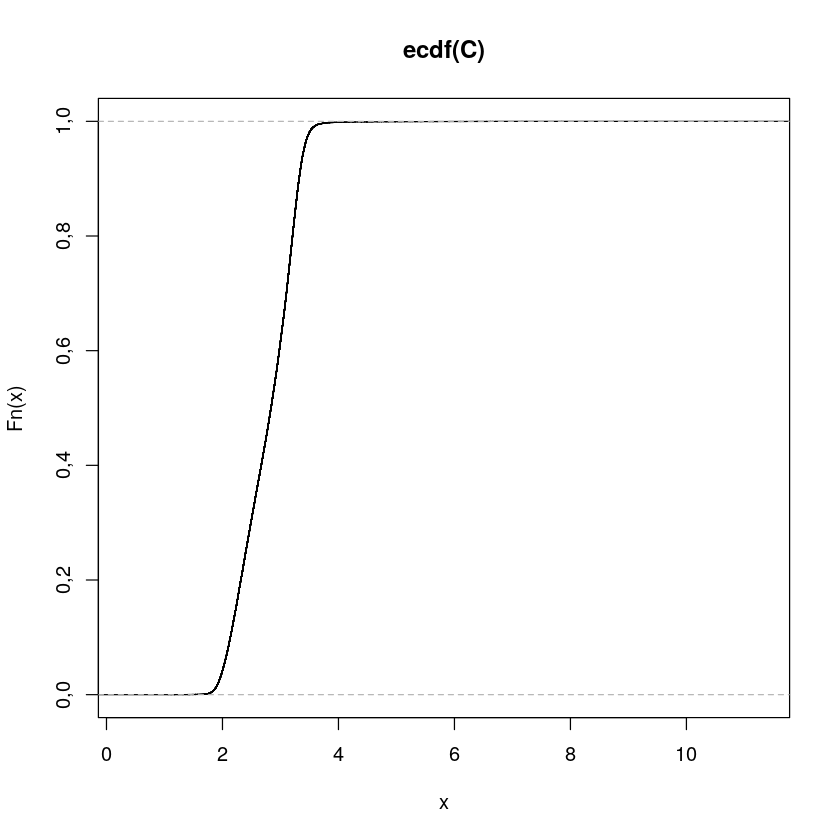

In [13]:
Fn <- ecdf(C)
plot(Fn,ylab="Fn(x)", pch = 19)
summary(Fn)
#plot(C,Fn(C))

In [14]:
tab_c_ran = data.frame(C, Fn(C))
head(tab_c_ran, 5)
tab_c_ran$C[25750]

C,Fn.C.
"3,125829","0,72171571"
"2,071557","0,06990771"
"2,316929","0,20026931"
"2,109680","0,08711813"
"2,974762","0,59615115"


[1] 1,06311

In [15]:
df_c = tab_c_ran[order(tab_c_ran$C),]
head(df_c,10)
#plot(tab$x,tab$Fn.x)
df_c$C[25750]

,C,Fn.C.
25750,"1,063110","1,402643e-05"
14346,"1,111935","2,805285e-05"
15166,"1,115991","4,207928e-05"
42741,"1,171615","5,610570e-05"
15302,"1,179554","7,013213e-05"
29977,"1,237674","8,415855e-05"
12695,"1,309621","9,818498e-05"
18131,"1,330263","1,122114e-04"
1239,"1,356382","1,262378e-04"
54534,"1,389543","1,402643e-04"


[1] 2,598867

In [16]:
set.seed(123)
x_ran = runif(87717)
#x_ran
length(x_ran)

[1] 87717

In [17]:
C_ran = c()
for (i in 1:length(x_ran)){
idx = which.min(abs(df_c$Fn.C - x_ran[i]))
#print(df_c$Fn.C[idx])
#print(df_c$Fn.C[idx-1])
C_ran[i] = df_c$C[idx]
#print(df_c$C[idx-1])
#print(idx)
#print(df_c$C[idx])
}

[1] 1,063110 9,313244

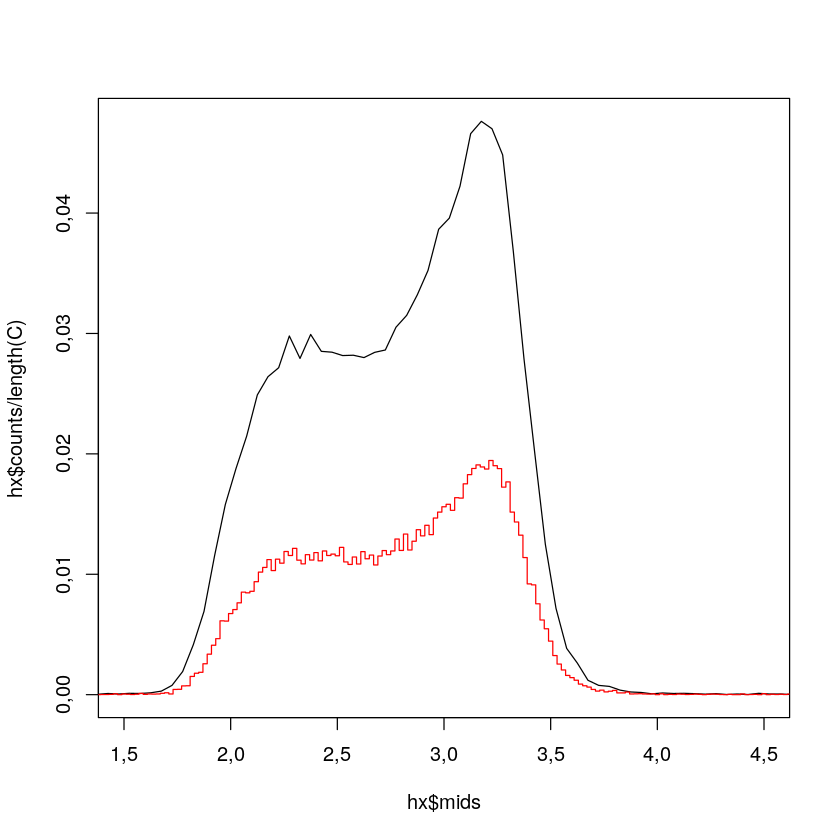

In [18]:
limx=c(1.5,4.5)

plot(hx$mids,hx$counts/length(C),type='l',xlim=limx)

hr = hist(C_ran,plot=F,breaks=300)
points(hr$mids,hr$counts/length(C_ran),type='s',xlim=limx,col='red')
range(C_ran)

## [ dfgalcg] Seleccion de glx en CG c/ r50 malo

In [20]:
dfgalcg = read.table("../data/tab_gal_gru.dat")
colnames(dfgalcg) <- c('gruID','ngal', 'ra', 'dec', 'zCMB', 'rextAB', 'gextAB', 'uextAB','galID',
                       'r50','r90','rabs','gabs','uabs','pasiva')

In [21]:
head(dfgalcg,3)

gruID,ngal,ra,dec,zCMB,rextAB,gextAB,uextAB,galID,r50,r90,rabs,gabs,uabs,pasiva
1,1,"114,844","45,118","0,079785","14,719","15,661","18,910","1,237664e+18","6,580098","20,917290","-22,38191","-21,56168","-19,65829",1
1,2,"114,840","45,124","0,077575","16,380","16,885","18,360","1,237664e+18","2,361705","5,640143","-20,61242","-20,12822","-18,97008",0
1,3,"114,850","45,082","0,078914","16,813","17,693","19,805","1,237664e+18","1,159409","3,226531","-20,25581","-19,49058","-17,69719",1


In [22]:
galmal = subset(dfgalcg, dfgalcg$r50 < 1.6)
galbien = subset(dfgalcg, dfgalcg$r50 >= 1.6)

length(galmal$r50) #+length(galbien$r50)
#head(galmal,5)

[1] 213

##### Seleccionar C para glx en CG c/ r50 malo usando df1

[1] -22,92778 -17,88611

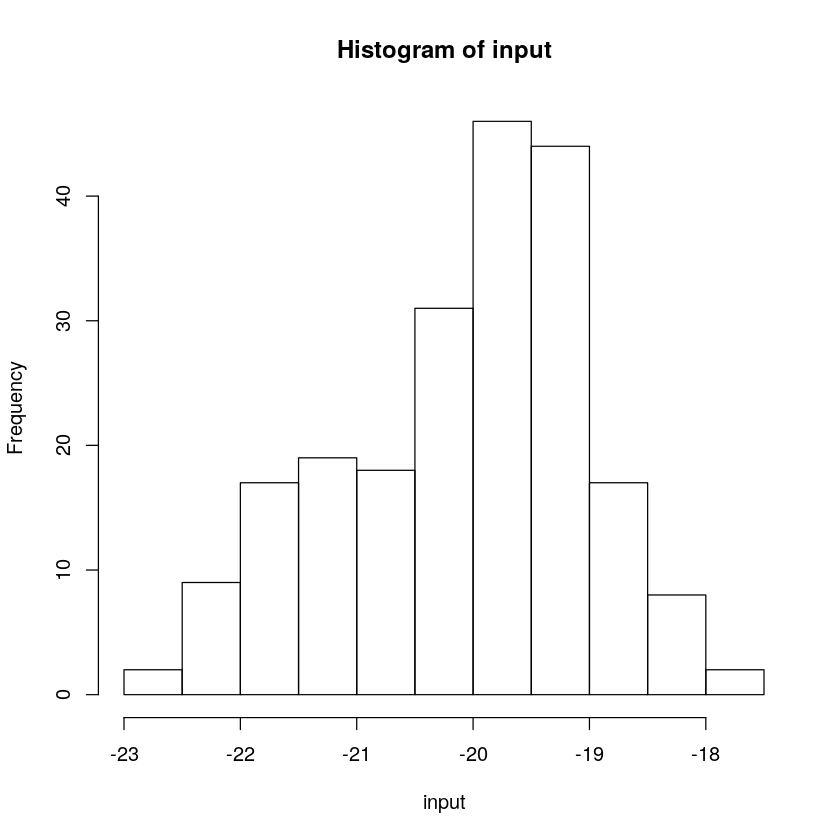

In [23]:
#A partir de la rabs de la glx con r50 malo saco un C.
input = galmal$rabs
range(input)
hist(input)

## [ dfmalo ] Seleccion de glx tempel c/ r50 malo

In [24]:
dfmalo = subset(df, df$r50 < 1.6)

length(dfmalo$r50)
head(dfmalo,5)

[1] 87717

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
6,"1,237649e+18","3,523255","-0,01835112","0,08732364","17,50251","18,48995","20,36814","-19,80891","-18,96725","-17,14154","1,296098","3,602817"
14,"1,237649e+18","3,551010","-0,02166187","0,04857951","17,64718","18,06866","19,17621","-18,28660","-17,85262","-16,84377","1,433536","4,034184"
16,"1,237649e+18","3,623351","-0,02089063","0,07928925","17,54270","18,35945","20,06243","-19,53030","-18,82049","-17,16381","1,291772","3,856141"
18,"1,237649e+18","3,652285","-0,01953914","0,14824218","16,97055","17,99888","19,86626","-21,61892","-20,84392","-19,02611","1,419872","3,944045"
22,"1,237649e+18","3,521447","-0,01420114","0,07551352","17,31019","18,05258","19,67716","-19,64450","-18,98701","-17,41379","1,378608","3,359439"


##### Seleccionar C para dfmalo usando df1

[1] -4,548439e+09 -5,657943e+00

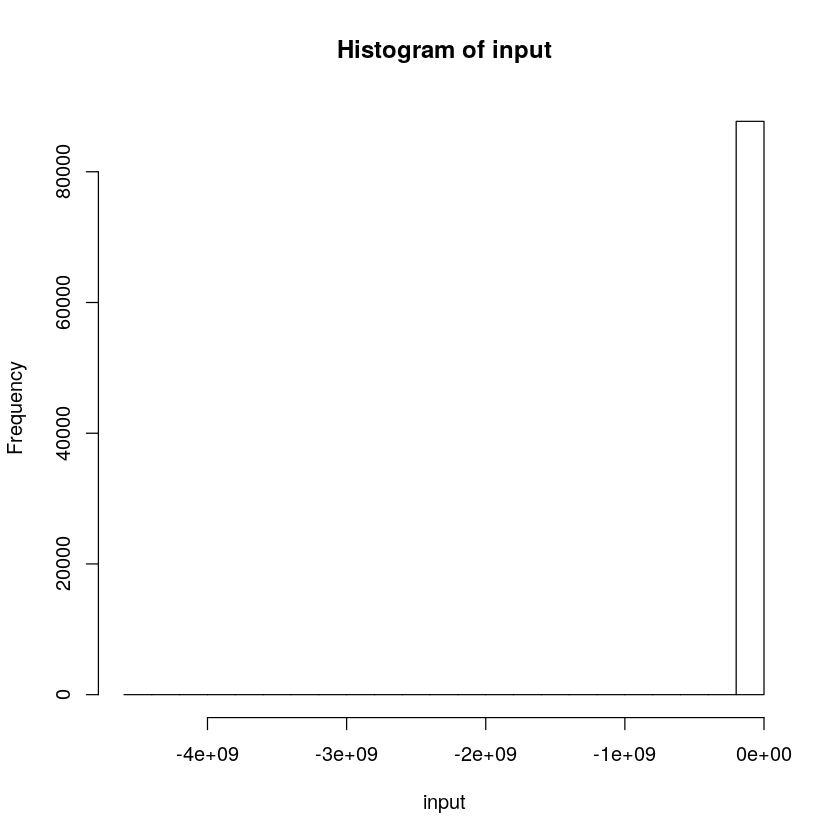

In [25]:
#A partir de la rabs de la glx con r50 malo saco un C.
input = dfmalo$rabs
range(input)
hist(input)

## Unir indice Concentracion de glx c/ r50 malo y bueno

In [26]:
length(dfmalo$r50) + length(dfbueno$r50)

[1] 557559

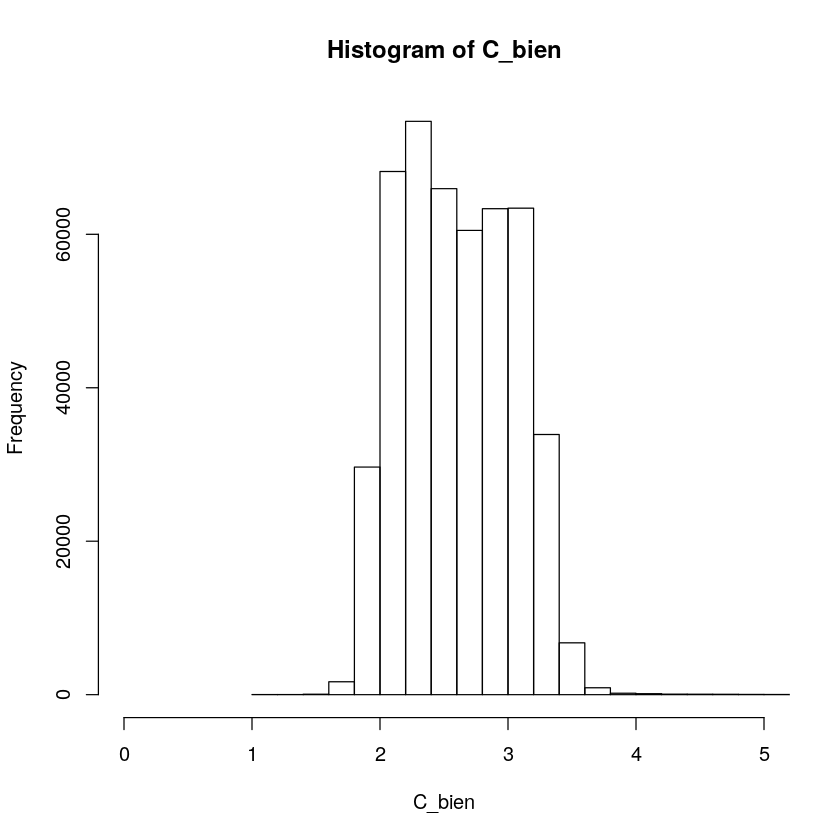

In [27]:
C_bien = dfbueno$r90/dfbueno$r50
hist(C_bien, xlim=c(0,5),breaks=200)